In [1]:
import pickle
import numpy as np

from gie import GosInE
from simulation_util import *

from load_data import *

In [7]:
def load_data(delta, high, low, alpha = 1, t = 100000, k = 20, n = 5, iters = 20, root_dir="../data/rec"):
    kl = []
    kl_index = []

    for i in range(iters):
        kl.append(pickle.load(open(f"{root_dir}/klucb_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb")))
        kl_index.append(pickle.load(open(f"{root_dir}/klucb_index_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb")))

    return (kl, kl_index)

In [12]:
def plot_results(delta, high, low, n, k, alpha = 1):
    # Load data
    (ucb_data, klucb_data) = load_data(delta=delta, high=high, low=low, alpha = 1, n = n, k = k, iters = 20)
    
    # Average Results
    ucb_avg_cum_reg = average_results([ucb.average_regret() for ucb in ucb_data])
    klucb_avg_cum_reg = average_results([klucb.average_regret() for klucb in klucb_data])
    
    # Plot Data
    plt.plot(ucb_avg_cum_reg, color="r", label = "most-played")
    plt.plot(klucb_avg_cum_reg, color="g", label = "highest-index")
    plt.xlabel("Time")
    plt.ylabel("Regret")
    plt.legend()
    plt.show()

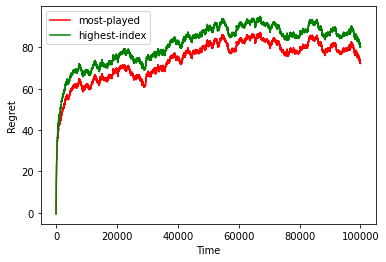

In [13]:
plot_results(0.1, 0.9, 0.2, 5, 20)

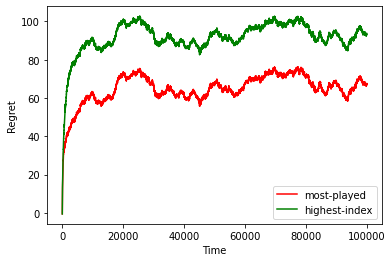

In [14]:
plot_results(0.1, 0.9, 0.2, 10, 30)

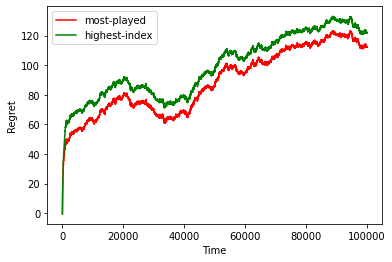

In [15]:
plot_results(0.1, 0.9, 0.2, 20, 50)